[ 0.27073666  0.21588143  0.11532737]


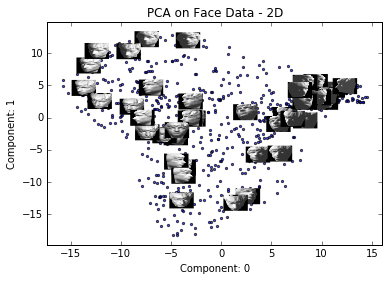

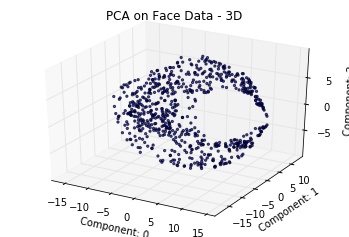

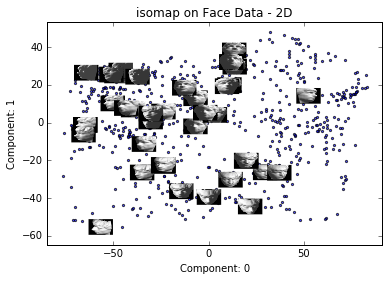

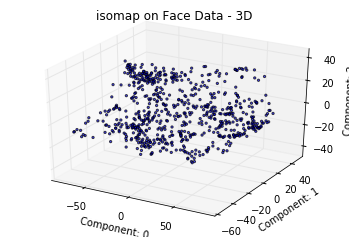

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import random, math

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

def Plot2D(T, title, x, y, num_to_plot=40):
  # This method picks a bunch of random samples (images in your case)
  # to plot onto the chart:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
  for i in range(num_to_plot):
    img_num = int(random.random() * num_images)
    x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
    x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
    img = df.iloc[img_num,:].reshape(num_pixels, num_pixels)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

  # It also plots the full scatter:
  ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

def Plot3D(T, title, x, y, z, num_to_plot=40):
  # This method picks a bunch of random samples (images in your case)
  # to plot onto the chart:
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  ax.set_zlabel('Component: {0}'.format(z))
  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
  z_size = (max(T[:,z]) - min(T[:,z])) * 0.08
  for i in range(num_to_plot):
    img_num = int(random.random() * num_images)
    x0, y0, z0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2., T[img_num,z]-z_size/2.
    x1, y1, z1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2., T[img_num,z]+z_size/2., 

    img = df.iloc[img_num,:].reshape(num_pixels, num_pixels)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

  # It also plots the full scatter:
  ax.scatter(T[:,x],T[:,y],T[:,z], marker='.',alpha=0.7)

# A .MAT file is a .MATLAB file. The faces dataset could have came
# in through .png images, but we'll show you how to do that in
# anither lab. For now, you'll see how to import .mats:
mat = scipy.io.loadmat('datasets/face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

# Rotate the pictures, so we don't have to crane our necks:
for i in range(num_images):
  df.loc[i,:] = df.loc[i,:].reshape(num_pixels, num_pixels).T.reshape(-1)


#
# TODO: Implement PCA here. Reduce the dataframe df down
# to THREE components. Once you've done that, call Plot2D.
#
# The format is: Plot2D(T, title, x, y, num_to_plot=40):
# T is your transformed data, NDArray.
# title is your chart title
# x is the principal component you want displayed on the x-axis, Can be 0 or 1
# y is the principal component you want displayed on the y-axis, Can be 1 or 2
#
# .. your code here ..
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
T = pca.fit_transform(df) 
print(pca.explained_variance_ratio_) 
x = 0
y = 1
z = 2
title = "PCA on Face Data - 2D"
Plot2D(T, title, x, y, num_to_plot=40)
title = "PCA on Face Data - 3D"
Plot3D(T, title, x, y, z, num_to_plot=40)

#
# TODO: Implement Isomap here. Reduce the dataframe df down
# to THREE components. Once you've done that, call Plot2D using
# the first two components.
#
# .. your code here ..
from sklearn import manifold
iso = manifold.Isomap(n_neighbors=4,n_components=3)
T = iso.fit_transform(df) 
title = "isomap on Face Data - 2D"
Plot2D(T, title, x, y, num_to_plot=40)
title = "isomap on Face Data - 3D"
Plot3D(T, title, x, y, z, num_to_plot=40)
#
plt.show()